In [10]:
import os
import numpy as np
from scapy.all import *
from tqdm import tqdm
from datetime import datetime as dt

In [11]:
CLIENT_SUBNET = "172"

In [12]:
DIR = "../pcaps/AWS_21k"

In [13]:
DATA_NAME = "AWS_21k"

In [14]:

def is_inbound(packet):
    if packet[IP].src[:3] == CLIENT_SUBNET:
        return False
    else:
        return True

In [15]:
dir_list = os.listdir(DIR)

In [16]:
def encode_pcap(path_to_pcap):
    packets = rdpcap(path_to_pcap)
    
    result = np.zeros(5000, dtype=int)
    
    for i, packet in enumerate(packets):
        if i >= 5000:
            break
        if is_inbound(packet):
            result[i] = 1
        else:
            result[i] = -1

    return result


In [17]:
def process_pcaps_in_directory(directory_path, function):
    features = []
    labels = []

    for file_name in tqdm(os.listdir(directory_path)):
        if file_name.endswith('.pcap'):
            pcap_path = os.path.join(directory_path, file_name)
            pcap_features = function(pcap_path)
            features.append(pcap_features)

            label = file_name.split('-')[0]
            labels.append(label)

    features_array = np.array(features)
    labels_array = np.array(labels)

    return features_array, labels_array

In [18]:
features, labels = process_pcaps_in_directory(DIR, encode_pcap)

100%|██████████| 21367/21367 [6:19:25<00:00,  1.07s/it]   


In [19]:
features[1]

array([ 1, -1, -1, ...,  0,  0,  0])

In [21]:
# save = input("Do you want to save? y/n") == "y"
save = True

if save:
    date_time_format = '%Y_%m_%d__%H_%M_%S'
    current_datetime = dt.now()
    current_datetime_string = dt.strftime(current_datetime, date_time_format)

    with open(f"{DATA_NAME}-features-{current_datetime_string}.npy", "wb") as f:
        np.save(f, features)

    with open(f"{DATA_NAME}-labels-{current_datetime_string}.npy", "wb") as f:
        np.save(f, labels)

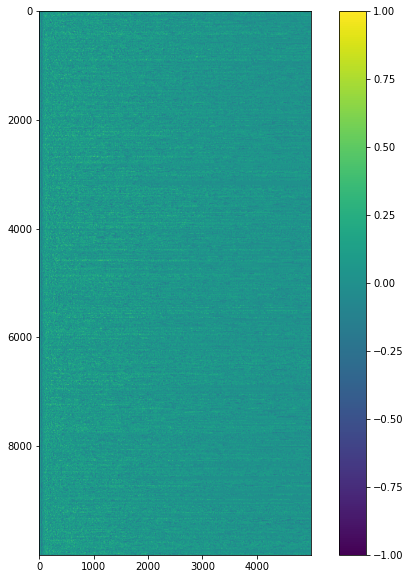

In [22]:

fig, ax = plt.subplots(figsize=(10,10))

# Display the 6x6 data
im = ax.imshow(features[:10000], cmap='viridis')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)

plt.show()

In [23]:
def vis_category(label):
    cat = []

    for i, x in enumerate(features):
        if labels[i] == label:
            cat.append(x)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15, 15))

    # Display the 6x6 data
    im = ax.imshow(cat, cmap='viridis')

    # Add a colorbar
    cbar = fig.colorbar(im, ax=ax)

    plt.show()

zoom.us


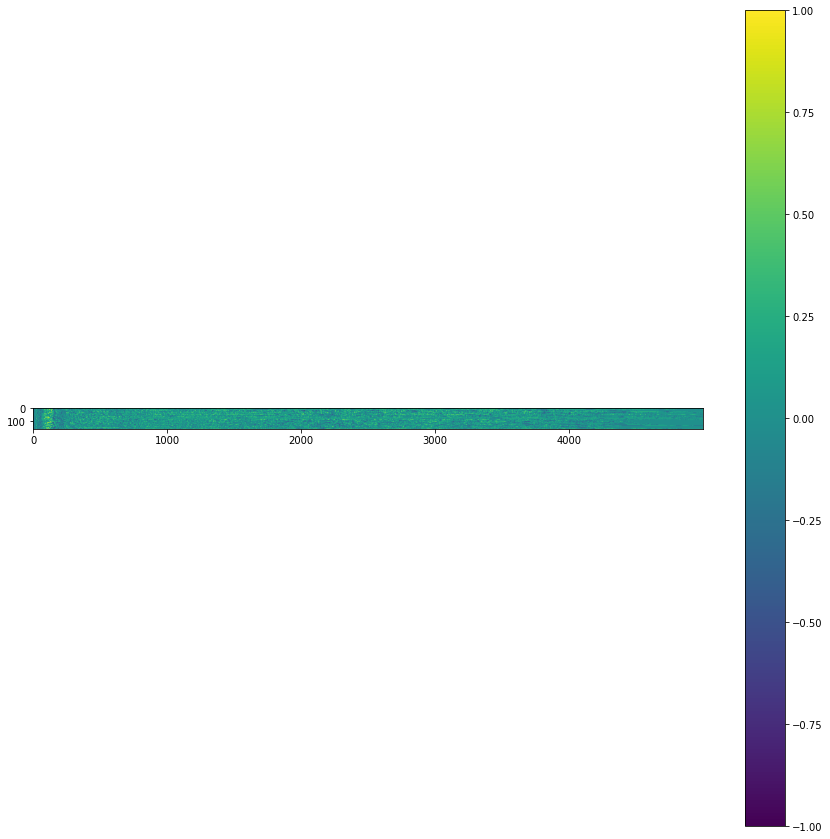

In [32]:
print(labels[3])
vis_category(labels[3])

tiktok.com


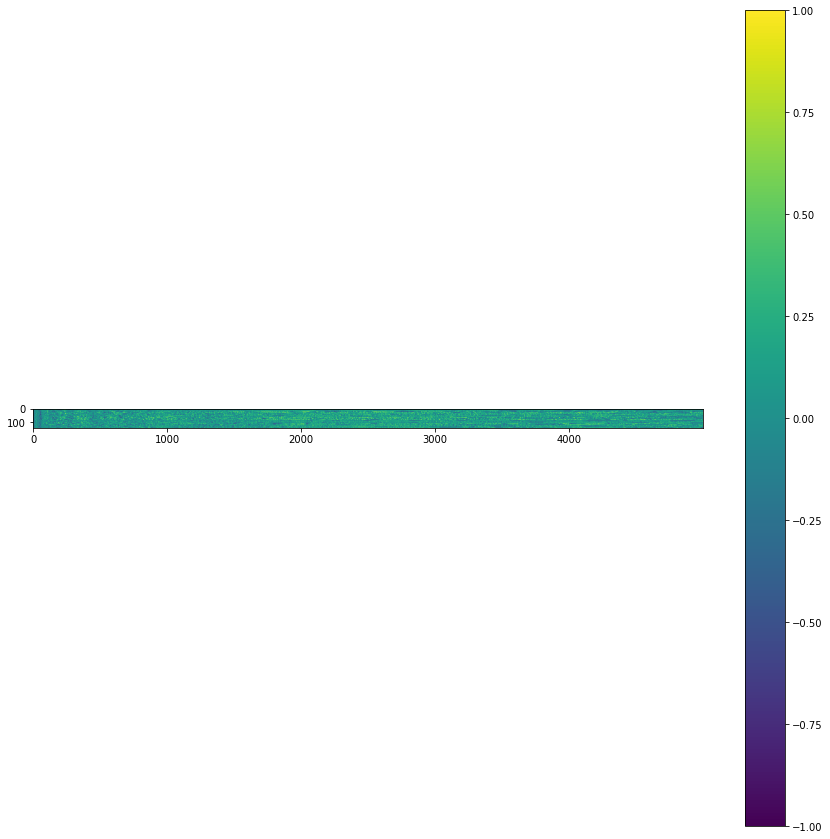

In [36]:
print(labels[8])
vis_category(labels[8])